In [1]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stock="ASIANPAINT"
start=start=date(2021,5,1)
end=date(2021,6,24)
end2=date(2021,7,29)
end3=date(2021,8,26)
data_nearmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end,
expiry_date=end)
data_nextmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end2,
expiry_date=end2)
data_farmonth_fut = get_history(symbol=stock,futures=True,start=start, end=end3,
expiry_date=end3)
stock_data = get_history(symbol=stock,start=start, end=end3)

In [2]:
stock_data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-07-16,ASIANPAINT,EQ,2983.60,2994.0,3006.0,2965.00,2989.90,2989.30,2983.47,1062548,3.170083e+14,54021,582920,0.5486
2021-07-19,ASIANPAINT,EQ,2989.30,2989.3,2999.7,2965.00,2980.00,2981.95,2981.64,837836,2.498125e+14,55888,383471,0.4577
2021-07-20,ASIANPAINT,EQ,2981.95,2996.0,3179.5,2979.55,3145.05,3159.05,3090.59,6755922,2.087981e+15,311385,1145884,0.1696
2021-07-22,ASIANPAINT,EQ,3159.05,3130.0,3165.0,3090.00,3101.30,3106.75,3121.84,1982572,6.189276e+14,120866,646868,0.3263
2021-07-23,ASIANPAINT,EQ,3106.75,3106.0,3129.6,3078.05,3085.15,3083.75,3097.38,815329,2.525383e+14,60645,277838,0.3408


In [3]:
OI_combined= pd.concat([data_nearmonth_fut['Open Interest'],data_nextmonth_fut['Open Interest'], data_farmonth_fut['Open Interest']],
axis=1)
OI_combined['oi_combined']=OI_combined.sum(axis=1)
OI_combined['close'] = stock_data.Close
OI_combined['price_change'] = (stock_data['Close'].pct_change()) * 100
OI_combined['oi_change'] = OI_combined['oi_combined'].diff()
OI_combined['oi_pct_change'] = (OI_combined['oi_combined'].pct_change()) * 100
OI_combined['delivery'] = stock_data['Deliverable Volume']
OI_combined['%Deliverble'] = stock_data['%Deliverble']
OI_combined['VWAP'] = stock_data['VWAP']
OI_combined['5d_del_avg'] = stock_data.iloc[:,12].rolling(window=5).mean()
OI_combined['chg_delivery'] =  OI_combined['delivery'] / OI_combined['5d_del_avg']

In [9]:
OI_combined['long_build_up'] = np.where((OI_combined['price_change'] > 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end), OI_combined['oi_change'], 0)

In [10]:
OI_combined['short_buildup'] = np.where((OI_combined['price_change'] < 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end), OI_combined['oi_change'], 0)

In [12]:
OI_combined['long_unwinding'] = np.where((OI_combined['price_change'] < 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end), OI_combined['oi_change'], 0)

In [13]:
OI_combined['short_covering'] = np.where((OI_combined['price_change'] > 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end), OI_combined['oi_change'], 0)

In [16]:
OI_combined.tail()

,Open Interest,Open Interest,Open Interest,oi_combined,close,price_change,oi_change,oi_pct_change,delivery,%Deliverble,VWAP,5d_del_avg,chg_delivery,long_build_up,short_buildup,long_unwinding,short_covering
2021-07-16,NaN,3996900,111300.0,4108200.0,2989.30,0.191044,207600.0,5.322258,582920,0.5486,2983.47,402015.8,1.449993,207600.0,0.0,0.0,0.0
2021-07-19,NaN,4028700,167400.0,4196100.0,2981.95,-0.245877,87900.0,2.139623,383471,0.4577,2981.64,396694.6,0.966666,0.0,87900.0,0.0,0.0
2021-07-20,NaN,4365300,428400.0,4793700.0,3159.05,5.939067,597600.0,14.241796,1145884,0.1696,3090.59,542284.8,2.113067,597600.0,0.0,0.0,0.0
2021-07-22,NaN,3965400,537900.0,4503300.0,3106.75,-1.655561,-290400.0,-6.057951,646868,0.3263,3121.84,622342.4,1.039409,0.0,0.0,-290400.0,0.0
2021-07-23,NaN,3689400,607500.0,4296900.0,3083.75,-0.740323,-206400.0,-4.583306,277838,0.3408,3097.38,607396.2,0.457425,0.0,0.0,-206400.0,0.0


In [29]:
OI_combined['total_long_buildup_14'] = OI_combined['long_build_up'].rolling(window=14).sum() + OI_combined['long_unwinding'].rolling(window=14).sum()

In [30]:
OI_combined['total_short_buildup_14'] = OI_combined['short_buildup'].rolling(window=14).sum() + OI_combined['short_covering'].rolling(window=14).sum()

In [31]:
OI_combined[['short_buildup', 'short_covering', 'total_short_buildup_14']]

,short_buildup,short_covering,total_short_buildup_14
2021-05-03,0.0,0.0,NaN
2021-05-04,0.0,0.0,NaN
2021-05-05,16800.0,0.0,NaN
2021-05-06,45000.0,0.0,NaN
2021-05-07,0.0,0.0,NaN
2021-05-10,0.0,0.0,NaN
2021-05-11,35400.0,0.0,NaN
2021-05-12,0.0,0.0,NaN
2021-05-14,0.0,0.0,NaN
2021-05-17,0.0,0.0,NaN


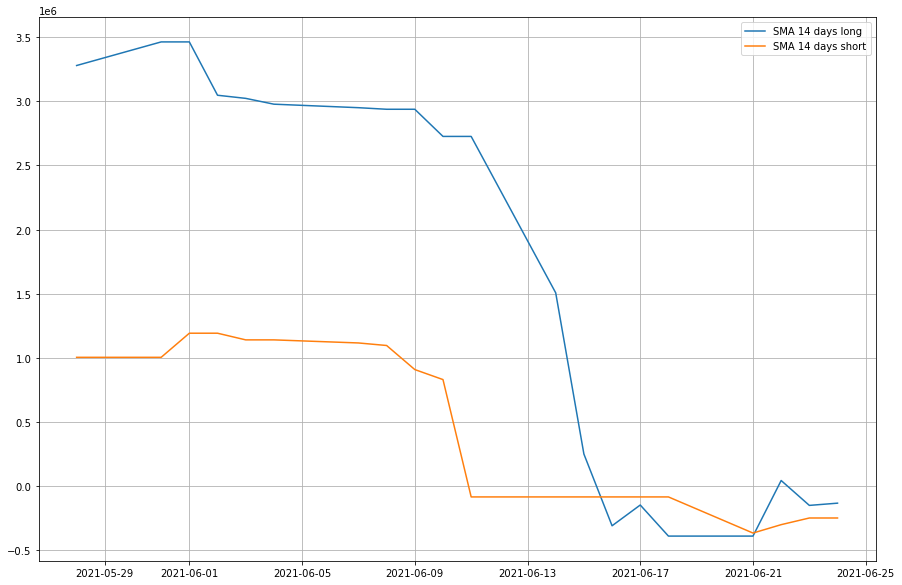

In [45]:
# Plot Graph
# fig, axs = plt.subplots(2)
plt.figure(figsize=[15,10])
OI_combined.dropna(inplace=True)
plt.grid(True)
#df.index = df.Date
#plt.xticks(df['Date'])
plt.plot(OI_combined.index, 'total_long_buildup_14', data=OI_combined, label='SMA 14 days long')
plt.plot(OI_combined.index, 'total_short_buildup_14', data=OI_combined, label='SMA 14 days short')
# xs[0].plot(df['delivery_SMA_10'],label='SMA 10 days delivery')
# axs[0].legend(loc=2)
plt.legend()
plt.show()

In [6]:
conditions = [
    (OI_combined['price_change'] > 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end),
    (OI_combined['price_change'] < 0) & (OI_combined['oi_change'] > 0) & (OI_combined.index != end),
    (OI_combined['price_change'] < 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end),
    (OI_combined['price_change'] > 0) & (OI_combined['oi_change'] < 0) & (OI_combined.index != end)
    ]

In [7]:
values = ['long_buildup', 'short_buildup', 'long_unwinding', 'short_covering']

In [8]:
OI_combined['action'] = np.select(conditions, values)

In [20]:
OI_combined[['oi_change','action', 'oi_combined']]

,oi_change,action,oi_combined
2021-05-03,NaN,0,67800.0
2021-05-04,46200.0,long_buildup,114000.0
2021-05-05,16800.0,short_buildup,130800.0
2021-05-06,45000.0,short_buildup,175800.0
2021-05-07,13500.0,long_buildup,189300.0
2021-05-10,21900.0,long_buildup,211200.0
2021-05-11,35400.0,short_buildup,246600.0
2021-05-12,-17400.0,long_unwinding,229200.0
2021-05-14,24300.0,long_buildup,253500.0
2021-05-17,27900.0,long_buildup,281400.0


In [25]:
OI_combined['total_short_buildup'] = OI_combined.rolling(window=2)[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined.rolling(window=2)[OI_combined['action'] == "short_covering"]['oi_change'].sum()

KeyError: 'Columns not found: False, True'

In [27]:
dir(OI_combined.rolling(window=2))

['VWAP',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_doc',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_multiple_funcs',
 '_apply',
 '_attributes',
 '_builtin_table',
 '_center_window',
 '_constructor',
 '_create_blocks',
 '_cython_table',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_generate_cython_apply_func',
 '_get_cython_func',
 '_get_cython_func_type',
 '_get_roll_func',
 '_get_win_type',
 '_get_window',
 '_get_window_indexer',
 '_gotitem',
 '_internal_names',
 '_internal_names_set',
 '_is_builtin_func',
 '_obj_with_exclusions',
 '_on

In [12]:
OI_combined[OI_combined['%Deliverble'] > 0.5][['close', 'VWAP']]

,close,VWAP
2021-05-06,2549.05,2545.52
2021-05-10,2556.95,2563.10
2021-06-02,2903.70,2902.17
2021-06-03,2935.35,2921.21
2021-06-08,2926.25,2922.05
2021-06-10,2950.60,2940.62
2021-06-11,2956.25,2953.60
2021-06-18,3047.20,3043.93
2021-07-09,3010.60,3016.09
2021-07-12,2999.40,3009.20


In [13]:
total_short_buildup = OI_combined[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined[OI_combined['action'] == "short_covering"]['oi_change'].sum()

In [14]:
total_short_buildup

2098200.0

In [15]:
total_long_buildup > total_short_buildup

True

In [19]:
total_short = OI_combined.shift(periods=5)[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined.shift(periods=5)[OI_combined['action'] == "short_covering"]['oi_change'].sum()

In [20]:
total_short

1095600.0

In [1]:
OI_combined.tail()[OI_combined['action'] == "short_buildup"]['oi_change'].sum() - OI_combined.tail()[OI_combined['action'] == "short_covering"]['oi_change'].sum()

NameError: name 'OI_combined' is not defined

In [94]:
total_long_buildup - total_short_buildup

4314900.0

In [ ]:

total_long_buildup = OI_combined[OI_combined['action'] == "long_buildup"]['oi_change'].sum() - OI_combined[OI_combined['action'] == "long_unwinding"]['oi_change'].sum()

In [112]:
last_14_days = OI_combined['oi_change'].rolling(window=3)
print(last_14_days['action'])

AttributeError: 'Series' object has no attribute 'columns'

In [4]:
# Creating a function to generate rollover percent
def rollover():
   ''' This function takes the futures data, expiry date
       and returns an estimate of rollover percent '''
  
   #df = data.loc[expiry_date]
  
   Near_month_oi = data_nearmonth_fut['Open Interest'].mean()
   Next_month_oi = data_nextmonth_fut['Open Interest'].mean()
   Far_month_oi = data_farmonth_fut['Open Interest'].mean()
  
   return round(100* (Next_month_oi + Far_month_oi) /  (Near_month_oi + Next_month_oi + Far_month_oi),2)

# Creating a new DataFrame with rollover % for expiry dates
expiry_dates =[end,end2,end3]

expiry_df = pd.DataFrame(index=expiry_dates , columns = ['rollover %','oi', stock])

for i in range(len(expiry_dates)):
    expiry_df['rollover %'].iloc[i] = rollover()
    expiry_df['oi'].iloc[i] = data_nextmonth_fut['Open Interest']#.loc[expiry_dates[i]]
    expiry_df[stock].iloc[i] = data_nearmonth_fut['Close']#.loc[expiry_dates[i]]
  
expiry_df.index.name='Expiry_date'
expiry_df

ValueError: No axis named 1 for object type Series

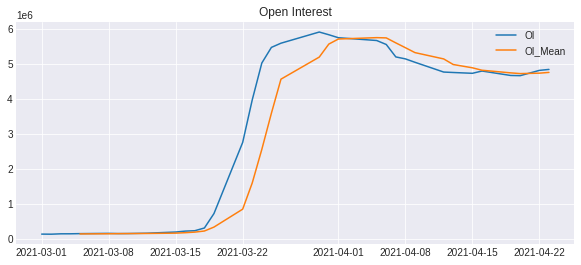

In [66]:
ax =OI_combined['Close'].plot(figsize=(15,7), color='b')
plt.ylabel('Future Price',fontsize='x-large')
plt.title(' Price vs OI \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry

#plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)

OI_combined['OI_Combined'].plot(ax=ax, secondary_y=True,color='black')
plt.ylabel('OI for Stock',fontsize='x-large')
plt.legend()
plt.show()

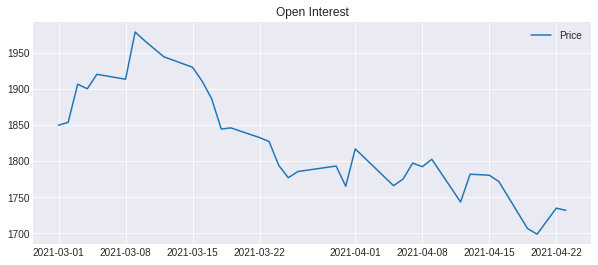

In [59]:
plt.figure(1,figsize=(10,9))
plt.subplot(211)
plt.title('Open Interest')
#plt.plot(OI_combined.OI_Combined,label='OI')
plt.plot(OI_combined.Close,label='Close')
#plt.plot(OI_combined.Close,label='Price')
plt.legend(['Price'])

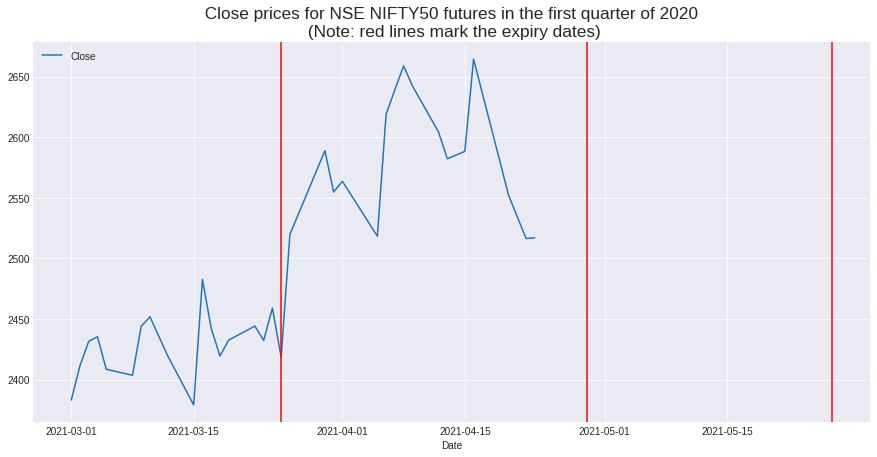

In [67]:
OI_combined['Close'].plot(figsize=(15,7))
plt.title(' Close prices for NSE NIFTY50 futures in the first quarter of 2020 \n (Note: red lines mark the expiry dates)'\
        ,fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry
plt.legend()
plt.show()

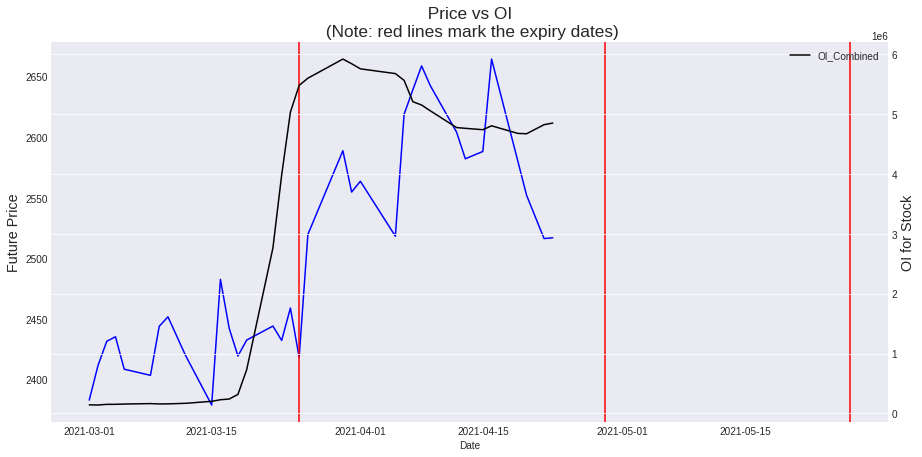

In [68]:
ax =OI_combined['Close'].plot(figsize=(15,7), color='b')
plt.ylabel('Future Price',fontsize='x-large')
plt.title(' Price vs OI \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.axvline(datetime(2021, 3, 25), color='r') # Jan expiry
plt.axvline(datetime(2021, 4, 29),color='r') # Feb expiry
plt.axvline(datetime(2021, 5, 27),color='r') # March expiry

#plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)

OI_combined['OI_Combined'].plot(ax=ax, secondary_y=True,color='black')
plt.ylabel('OI for Stock',fontsize='x-large')
plt.legend()
plt.show()